# Run 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import joblib
from pickle import dump
from pandas import read_csv
from pickle import load

%matplotlib inline

In [2]:
from astroquery.ned import Ned
import astropy.units as u
from astropy import coordinates
from astropy.table import Table
import time
from astropy.coordinates import SkyCoord

In [3]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.gaussian_process.kernels import RBF

In [4]:
data_type = input('1: PCA\n 2: Scaled Data\n 3: Raw Data\n')

1: PCA
 2: Scaled Data
 3: Raw Data
1


# PCA & data scaling

In [5]:
df_training =  pd.read_csv("training_set_v1_dr16.csv")
columnsNamesArr = df_training.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'w1', 'w2', 'w3', 'w4', 'link']


In [6]:
print(df_training.groupby('category').size())


category
Contaminant       214
Known galaxies     13
dtype: int64


In [7]:
features = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r','z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']
print(len(features))

15


In [8]:
plt.rcParams.update({'font.size': 20})

In [9]:
# # %matplotlib qt
# fig1 = plt.figure(figsize=(10,8))
# # sns.set_context("paper", font_scale=2)
# # sns.set(font_scale = 1.5)
# ax = sns.pairplot(df_training, 
#              vars = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r','z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude'],  hue="category",hue_order = ['Contaminant','Known galaxies'],
#              corner=True,
#              diag_kind = 'kde', 
#              plot_kws = {'alpha': 0.4, 's': 70, 'edgecolor': 'k'},
#              height=3);
# # Title 
# sns.move_legend(ax, "upper left")
# plt.suptitle('Training data pairplots', 
#              size = 30);
# plt.savefig('pair_plot_training_set_v1_dr16.pdf')

In [10]:
# classification as array of 0's and 1's
category = df_training['category']
classification = np.NaN*np.ones(len(category))
classification[category == 'Known galaxies'] = 1  
classification[category == 'Contaminant'] = 0 
print(len(classification))
print(len(classification[classification == 1]))

227
13


In [11]:
# define feature data and standardize it
data = df_training.loc[:,features].values
# define scaler
# scaler = StandardScaler()
scaler = RobustScaler()
# scaler = QuantileTransformer()
# fit scaler on the training dataset
scaler.fit(data)
# transform the training dataset
data_scaled = scaler.transform(data)

In [12]:
# transform data to 6 principle components which take into account 95 pct of the variance in the data
# pca = PCA(n_components = 11, random_state = 2020)

pca = PCA(n_components = 0.95, random_state = 2020) #this automatically chooses the amount of PC's for 95 pct variance

pca.fit(data_scaled)
principal_components = pca.transform(data_scaled)
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7'])
final_df = pd.concat([principal_df, df_training[['category']]], axis = 1)


In [13]:
plt.rcParams.update({'font.size': 10})

Text(0.5, 1.0, 'Influence on each principal component by features')

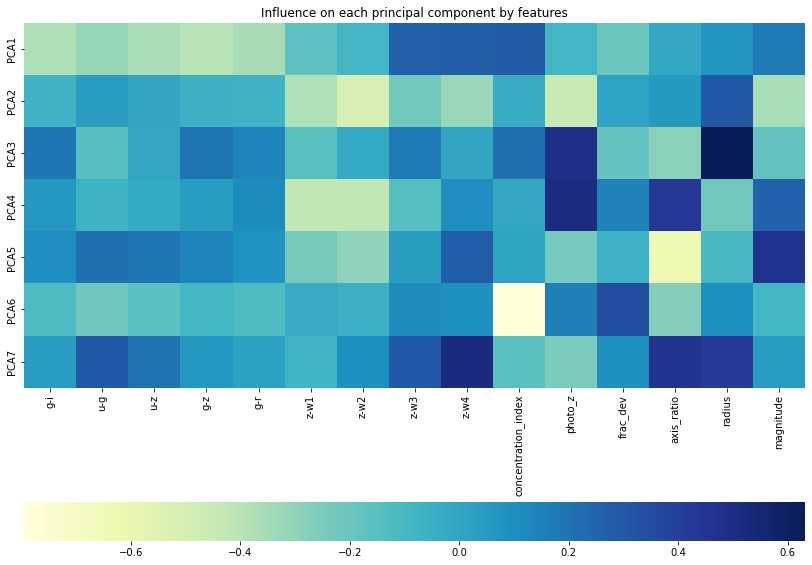

In [14]:
features_map = ['g-i', 'u-g', 'u-z', 'g-z', 'g-r','z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev','axis_ratio','radius', 'magnitude']
fig = plt.figure(figsize = (14,14))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=features_map,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
ax.set_title('Influence on each principal component by features')

In [15]:
X = principal_components
y = classification

In [16]:
if data_type == 1:
    X = principal_components
    y = classification
elif data_type == 2:
    X = data_scaled
    y = classification
elif data_type == 3:
    X = data
    y = classification

In [17]:
# X = data_scaled
# y = classification

In [18]:
# X = data
# y = classification

In [19]:
# scorign to balanced accuracy
# test svm and plot corner plots showing where its failing and iterate through individual contaminants
# add new corner plots for new 45 galaxy
# try rescaling radius to kpc


# chheck for ways to reduce overfitting maxdepth in decision tree
# ned look at photoz with wise

# Model training

In [27]:
# Spot Check Algorithms
random_state = 2020
models = []
models.append(('LR', LogisticRegression(random_state = 2020,solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state = 2020,gamma='auto')))
models.append(('GP', GaussianProcessClassifier(random_state = 2020)))
models.append(('RF', RandomForestClassifier(random_state = 2020,max_depth=None, n_estimators=100, max_features= 'auto')))
models.append(('MLP', MLPClassifier(random_state = 2020,activation='relu', solver='lbfgs', max_iter=1000,hidden_layer_sizes=(1500,1000,500))))
models.append(('PRCP', Perceptron(random_state = 2020, max_iter=30, tol = 0.001)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=2020, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='balanced_accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# try neural network

LR: 0.614583 (0.136216)
LDA: 0.697917 (0.080012)
KNN: 0.687500 (0.036084)
CART: 0.636399 (0.084595)
NB: 0.729167 (0.069096)
SVM: 0.802083 (0.080012)
GP: 0.718750 (0.090211)
RF: 0.570558 (0.071473)
MLP: 0.922366 (0.073877)
PRCP: 0.769458 (0.090175)


In [21]:
# # voting methods application
# clf1 = LogisticRegression(random_state = 2020,solver='liblinear', multi_class='ovr')
# clf2 = LinearDiscriminantAnalysis()
# clf3 = KNeighborsClassifier()
# clf4 = DecisionTreeClassifier()
# clf5 = GaussianNB()
# clf6 = GaussianProcessClassifier(random_state = 2020)
# clf7 = SVC(random_state = 2020,gamma='auto')
# clf8 = RandomForestClassifier(random_state = 2020,max_depth=None, n_estimators=100, max_features= 'auto')
# clf9 = MLPClassifier(random_state = 2020, activation='relu', solver='lbfgs', max_iter=100000)
# clf10 = Perceptron(random_state = 2020, max_iter=30, tol = 0.001)

# eclf1 = VotingClassifier(estimators=[('SVM', clf7), ('MLP', clf9)], voting='hard')
# eclf1.fit(X, y)
# eclf_predict = eclf1.predict(X)

In [28]:
clf = MLPClassifier(random_state = 2020,activation='relu', solver='lbfgs', max_iter=1000,hidden_layer_sizes=(1500,1000,500))
clf.fit(X,y)
clf_predict = clf.predict(X)

In [22]:
# # save the model
# dump(eclf1, open('voting_model_PCA_v1_dr7.pkl', 'wb'))
# # save the scaler
# dump(scaler, open('scaler_voting_model_PCA_v1_dr7.pkl', 'wb'))
# # save the pca
# dump(pca, open('pca_model_PCA_v1_dr7.pkl', 'wb'))

In [29]:
plt.rcParams.update({'font.size': 20})

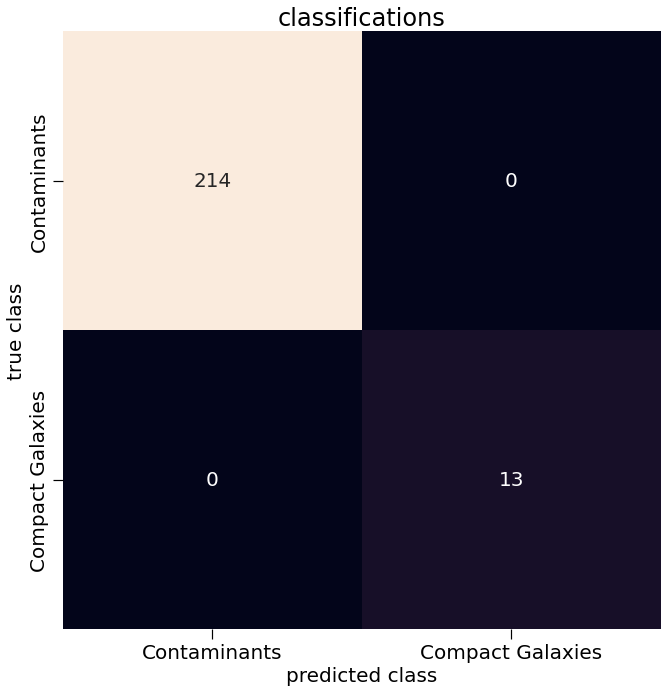

In [30]:
fig1 = plt.figure(figsize=(11,11))
g = sns.heatmap(confusion_matrix(y, clf_predict), square=True, annot=True, fmt="d", cbar=False, xticklabels=['Contaminants', 'Compact Galaxies'], yticklabels=['Contaminants', 'Compact Galaxies'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center')
plt.xlabel('predicted class')
plt.ylabel('true class')
plt.title('classifications')
plt.tick_params('both', length=10, width=1.2, which='major', labelsize=20)
plt.savefig('confusion_matrix.png')

# Model application on Atlas3D galaxies

In [31]:
df_atlas3d = pd.read_csv("atlas3d_search_dr16.csv")
columnsNamesArr = df_atlas3d.columns.values
column_names = list(columnsNamesArr)
print(column_names[1:])

['objid', 'ra', 'dec', 'g-i', 'u-g', 'u-z', 'g-z', 'g-r', 'z-w1', 'z-w2', 'z-w3', 'z-w4', 'concentration_index', 'photo_z', 'frac_dev', 'host_galaxy', 'distance', 'axis_ratio', 'category', 'radius', 'magnitude', 'u_mag', 'g_mag', 'i_mag', 'r_mag', 'z_mag', 'w1', 'w2', 'w3', 'w4', 'link']


In [32]:
objid = df_atlas3d['objid']
ra, dec = df_atlas3d['ra'], df_atlas3d['dec']
host_galaxy = df_atlas3d['host_galaxy']
distance = df_atlas3d['distance']
magnitude = df_atlas3d['magnitude']
category = df_atlas3d['category']
radius = df_atlas3d['radius']
u_mag, g_mag, r_mag, i_mag, z_mag = df_atlas3d['u_mag'], df_atlas3d['g_mag'], df_atlas3d['r_mag'], df_atlas3d['i_mag'], df_atlas3d['z_mag']
concentration_index = df_atlas3d['concentration_index']
frac_dev = df_atlas3d['frac_dev']
axis_ratio = df_atlas3d['axis_ratio']
photoz = df_atlas3d['photo_z']
category = df_atlas3d['category']
g_i, u_g, u_z, g_z, g_r = df_atlas3d['g-i'], df_atlas3d['u-g'], df_atlas3d['u-z'], df_atlas3d['g-z'], df_atlas3d['g-r']
magnitude = df_atlas3d['magnitude']
radius = df_atlas3d['radius']
z_w1, z_w2, z_w3, z_w4 = df_atlas3d['z-w1'], df_atlas3d['z-w2'], df_atlas3d['z-w3'], df_atlas3d['z-w4']
w1, w2, w3, w4 = df_atlas3d['w1'], df_atlas3d['w2'], df_atlas3d['w3'], df_atlas3d['w4']

In [33]:
category[category == 'Possible contaminants'] = 'Possible compact galaxies'

C:\Users\Home\AppData\Local\Temp/ipykernel_1668/2455194359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category[category == 'Possible contaminants'] = 'Possible compact galaxies'


In [34]:
#make a link to sdss for this object
objid = np.array(objid)
link = []
for i in range(len(objid)):
    url = 'http://skyserver.sdss.org/dr16/en/tools/explore/Summary.aspx?id=' + str(objid[i])
    link.append(url)
link = np.array(link)

In [35]:
print(df_atlas3d.groupby('category').size())

category
Known galaxies                  13
Possible compact galaxies    16832
dtype: int64


In [41]:
# #PCA
# X = df_atlas3d.loc[:,features].values
# X_scaled = scaler.transform(X)
# X_pca_scaled = pca.transform(X_scaled)
# y = eclf1.predict(X_pca_scaled) 

In [37]:
#PCA
X = df_atlas3d.loc[:,features].values
X_scaled = scaler.transform(X)
X_pca_scaled = pca.transform(X_scaled)
y = clf.predict(X_pca_scaled) 

In [42]:
# #Scaled
# X = df_atlas3d.loc[:,features].values
# X_scaled = scaler.transform(X)
# # X_pca_scaled = pca.transform(X_scaled)
# y = eclf1.predict(X_scaled) 

In [43]:
# #Raw
# X = df_atlas3d.loc[:,features].values
# # X_scaled = scaler.transform(X)
# # X_pca_scaled = pca.transform(X_scaled)
# y = eclf1.predict(X) 

In [38]:
index_1a = np.where(y == 1)[0]
print('Voting method:', len(index_1a))
index_1b = np.where(y == 0)[0]

Voting method: 681


In [39]:
# dictionary of lists  
dict = {'objid': objid[index_1a], 'ra': ra[index_1a], 'dec': dec[index_1a], 'g-i': g_mag[index_1a] - i_mag[index_1a], 'u-g': u_mag[index_1a] - g_mag[index_1a], 'u-z': u_mag[index_1a] - z_mag[index_1a], 'g-z': g_mag[index_1a] - z_mag[index_1a], 'g-r': g_mag[index_1a] - r_mag[index_1a],'z-w1': z_w1[index_1a],'z-w2': z_w2[index_1a],'z-w3': z_w3[index_1a],'z-w4': z_w4[index_1a], 'concentration_index': concentration_index[index_1a], 'photo_z': photoz[index_1a], 'frac_dev': frac_dev[index_1a], 'host_galaxy': host_galaxy[index_1a], 'distance': distance[index_1a], 'axis_ratio': axis_ratio[index_1a], 'category': category[index_1a], 'radius': radius[index_1a], 'magnitude': magnitude[index_1a], 'u_mag': u_mag[index_1a], 'g_mag': g_mag[index_1a], 'i_mag': i_mag[index_1a], 'r_mag': r_mag[index_1a], 'z_mag': z_mag[index_1a],'w1': w1[index_1a],'w2': w2[index_1a],'w3': w3[index_1a],'w4': w4[index_1a] , 'link': link[index_1a]}   
df_voting_results= pd.DataFrame(dict) 
    
# saving the dataframe 
df_voting_results.to_csv('voting_results_v1.csv',index = False) 

In [40]:
print(df_voting_results.groupby('category').size())
print('From a total of 871 host galaxies')

category
Known galaxies                13
Possible compact galaxies    668
dtype: int64
From a total of 871 host galaxies


# NED search for possible compact galaxies from 

In [41]:
objid_voting = df_voting_results['objid']
ra_voting, dec_voting = np.array(df_voting_results['ra']), np.array(df_voting_results['dec'])
host_galaxy_voting = df_voting_results['host_galaxy']
distance_voting = df_voting_results['distance']
magnitude_voting = df_voting_results['magnitude']
category_voting = df_voting_results['category']
radius_voting = df_voting_results['radius']
u_mag_voting, g_mag_voting, r_mag_voting, i_mag_voting, z_mag_voting = df_voting_results['u_mag'], df_voting_results['g_mag'], df_voting_results['r_mag'], df_voting_results['i_mag'], df_voting_results['z_mag']
concentration_index_voting = df_voting_results['concentration_index']
frac_dev_voting = df_voting_results['frac_dev']
axis_ratio_voting = df_voting_results['axis_ratio']
photoz_voting = df_voting_results['photo_z']
category_voting = df_voting_results['category']
g_i_voting, u_g_voting, u_z_voting, g_z_voting, g_r_voting = df_voting_results['g-i'], df_voting_results['u-g'], df_voting_results['u-z'], df_voting_results['g-z'], df_voting_results['g-r']
z_w1_voting, z_w2_voting, z_w3_voting, z_w4_voting = df_voting_results['z-w1'],df_voting_results['z-w2'],df_voting_results['z-w3'],df_voting_results['z-w4']
w1_voting, w2_voting, w3_voting, w4_voting = df_voting_results['w1'],df_voting_results['w2'],df_voting_results['w3'],df_voting_results['w4']
link_voting = df_voting_results['link']

In [44]:
name1 = []
ra1 = []
dec1 = []
velocity1 = []
redshift1 = []
flag1 = []
for i in range(len(ra_voting)):
    print(i)
    if i%200 == 0:
        time.sleep(15)
    co = coordinates.SkyCoord(ra=ra_voting[i], dec=dec_voting[i], unit=(u.deg, u.deg))
    results = Ned.query_region(co, radius=1* u.arcsec, equinox='J2000.0')
    if len(results) == 0:
        name1_temp, ra1_temp, dec1_temp, vel1_temp, redshift1_temp, flag1_temp = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
        name1.append(name1_temp)
        ra1.append(ra1_temp)
        dec1.append(dec1_temp)
        velocity1.append(vel1_temp)
        redshift1.append(redshift1_temp)
        flag1.append(flag1_temp)
    else:
        name1_temp, ra1_temp, dec1_temp, vel1_temp, redshift1_temp, flag1_temp = results['Object Name'], results['RA'], results['DEC'], results['Velocity'], results['Redshift'], results['Redshift Flag']
        for j in range(len(name1_temp)):
            name1.append(name1_temp[j])
            ra1.append(ra1_temp[j])
            dec1.append(dec1_temp[j])
            velocity1.append(vel1_temp[j])
            redshift1.append(redshift1_temp[j])
            flag1.append(flag1_temp[j])

0


WARNING

1
2
3
4
5
6
7

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


8
9
10
11
12
13
14

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]



15
16
17
18
19
20


21
22
23
24
25
26
27


WARNING

28
29
30
31
32
33
34
35

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


36
37
38


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


39
40
41
42
43
44


WARNING

45
46
47
48
49
50

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]



51
52
53
54
55
56


WARNING

57
58
59
60
61
62
63

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


64
65
66
67
68


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

69
70
71
72
73
74
75


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

76
77
78
79
80


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

81
82
83
84


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

85
86
87


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


88
89
90

WARNING


91
92
93
94


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

95
96
97
98
99
100
101

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


102
103
104
105
106
107


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


108
109
110
111
112
113
114
115


116
117
118
119
120
121
122


WARNING

123
124
125
126
127
128
129

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]



130
131
132
133
134
135

WARNING


136
137
138
139
140
141
142


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

143
144
145
146
147
148
149

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


150
151
152
153
154
155


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


156
157
158
159
160
161
162
163
164


165
166
167
168
169
170
171
172

WARNING


173
174
175
176
177
178


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


179
180
181
182
183
184
185


WARNING

186
187
188
189
190
191
192


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

193
194
195
196
197
198


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


199
200


201
202
203
204
205
206
207
208
209
210
211
212


213
214
215
216
217
218
219


WARNING

220
221
222
223
224
225
226
227

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


228
229
230
231
232
233
234

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


235
236
237
238
239
240


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

241
242
243
244
245
246
247


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


248
249
250
251
252
253
254
255
256
257
258
259
260
261

WARNING


262
263
264
265
266
267


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


268
269
270
271
272
273


WARNING

274
275
276
277
278
279


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

280
281
282
283
284
285
286


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]

287
288
289
290
291
292
293
294


WARNING


295
296
297
298


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


299
300
301
302
303


WARNING

304
305
306
307
308
309

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]



310


311
312
313


314
315
316
317


318
319
320


321
322
323
324


WARNING

325
326
327
328
329
330


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

331
332
333
334
335
336


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

337
338
339
340
341
342
343

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


344
345
346
347
348


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


349
350
351
352
353
354
355
356
357
358
359


WARNING

360
361
362
363
364


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


365
366
367
368


WARNING

369
370
371
372
373
374
375

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


376
377
378
379
380


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

381
382
383
384
385
386
387


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


388
389
390
391
392
393
394


395
396
397
398
399
400


WARNING

401
402
403
404
405
406
407
408

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING


409
410
411
412
413
414

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]



415
416
417


418
419
420


WARNING

421


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


422


423


424
425


426


427


428


429


430


431


432


433


434


435


WARNING

436
437
438

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


439


440


441
442
443


WARNING

444


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


445


446
447


448


449


450


451
452


453
454
455


456
457


458


459
460


461
462


463
464


465


466
467
468
469
470


471


472
473
474
475
476
477


478


479
480


481
482
483
484
485


486


487


488


489


490


491
492
493


494


495


496
497
498
499
500


501
502


503
504


505


506
507


508


509


510
511
512


513
514


515


516
517


518
519
520
521
522


523
524
525


526


527


528


529
530
531


532
533
534


535


536


537
538
539


540


541
542


WARNING

543


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]
WARNING

544


: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


545
546


547


548


549


550


551
552


553


554
555
556


557


558


559
560


561


562


563


564


565


566
567


568


569
570
571


WARNING

572
573

: AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead. [astroquery.ned.core]


574


575


576


577
578


579


580


581


582
583
584


585
586
587


588
589
590


591


592
593


594


595
596


597
598


599
600


601


602


603


604
605


606
607


608


609
610


611
612


613
614
615


616
617


618
619


620


621
622


623


624


625
626


627


628
629


630


631
632
633
634


635


636


637


638
639


640


641


642


643
644
645
646
647


648
649
650
651


652


653
654
655


656


657
658


659


660


661
662
663
664


665


666


667


668


669


670


671
672


673
674


675
676
677


678
679
680


In [45]:
# dictionary of lists  
dict = {'name': name1, 'ra': ra1, 'dec': dec1, 'velocity': velocity1, 'redshift': redshift1, 'flag': flag1}  
df_ned_voting = pd.DataFrame(dict) 
    
# saving the dataframe 
# df1.to_csv('ned_compact_dr7.csv') 

# NED (with specz > 0.01) and ML results crossmatching

In [46]:
ra_ned_voting, dec_ned_voting, name_ned_voting, velocity_ned_voting, redshift_ned_voting, flag_ned_voting = df_ned_voting['ra'], df_ned_voting['dec'], df_ned_voting['name'], df_ned_voting['velocity'], df_ned_voting['redshift'], df_ned_voting['flag']

In [47]:
redshift_ned_voting_1a = redshift_ned_voting.copy()
redshift_ned_voting_1a[redshift_ned_voting_1a == '--'] = np.nan
redshift_ned_voting_1a = redshift_ned_voting_1a.astype(float)

voting_specz_over = (redshift_ned_voting_1a > 0.01) & (flag_ned_voting == 'SPEC')

C:\Users\Home\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


In [48]:
ra_ned_voting_1 = np.array(ra_ned_voting[voting_specz_over])
dec_ned_voting_1 = np.array(dec_ned_voting[voting_specz_over])
name_ned_voting_1 =  np.array(name_ned_voting[voting_specz_over])
velocity_ned_voting_1 = np.array(velocity_ned_voting[voting_specz_over])
redshift_ned_voting_1 = np.array(redshift_ned_voting[voting_specz_over]).astype(float)
flag_ned_voting_1 = np.array(flag_ned_voting[voting_specz_over])

In [49]:
c1 = SkyCoord(ra=ra_voting*u.degree, dec=dec_voting*u.degree)
catalog1 = SkyCoord(ra=ra_ned_voting_1*u.degree, dec=dec_ned_voting_1*u.degree)
idx_1, d2d_1, d3d_1 = c1.match_to_catalog_sky(catalog1)

In [50]:
max_sep = 1 * u.arcsec
sep_constraint_1 = d2d_1 < max_sep
c1_matches = c1[sep_constraint_1]
catalog1_matches = catalog1[idx_1[sep_constraint_1]]

In [51]:
objid_training = df_training['objid']
ra_training, dec_training = df_training['ra'], df_training['dec']
host_galaxy_training = df_training['host_galaxy']
distance_training = df_training['distance']
magnitude_training = df_training['magnitude']
category_training = df_training['category']
radius_training = df_training['radius']
u_mag_training, g_mag_training, r_mag_training, i_mag_training, z_mag_training = df_training['u_mag'], df_training['g_mag'], df_training['r_mag'], df_training['i_mag'], df_training['z_mag']
concentration_index_training = df_training['concentration_index']
frac_dev_training = df_training['frac_dev']
axis_ratio_training = df_training['axis_ratio']
photoz_training = df_training['photo_z']
category_training = df_training['category']
g_i_training, u_g_training, u_z_training, g_z_training, g_r_training = df_training['g-i'], df_training['u-g'], df_training['u-z'], df_training['g-z'], df_training['g-r']
w1_training, w2_training, w3_training, w4_training = df_training['w1'],df_training['w2'],df_training['w3'],df_training['w4']
z_w1_training, z_w2_training,z_w3_training,z_w4_training = df_training['z-w1'],df_training['z-w2'],df_training['z-w3'],df_training['z-w4']
link_training = df_training['link']

In [52]:
category_voting[sep_constraint_1] = 'Contaminant'

C:\Users\Home\AppData\Local\Temp/ipykernel_1668/354860432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_voting[sep_constraint_1] = 'Contaminant'


# Creating new training data:
## Adding original training set + NED confirmed contaminants

In [53]:
objid_final = np.concatenate((objid_training,objid_voting[sep_constraint_1]))
ra_final, dec_final = np.concatenate((ra_training,ra_voting[sep_constraint_1])), np.concatenate((dec_training,dec_voting[sep_constraint_1]))
host_galaxy_final = np.concatenate((host_galaxy_training,host_galaxy_voting[sep_constraint_1]))
distance_final = np.concatenate((distance_training,distance_voting[sep_constraint_1]))
magnitude_final = np.concatenate((magnitude_training,magnitude_voting[sep_constraint_1]))
category_final = np.concatenate((category_training,category_voting[sep_constraint_1]))
radius_final = np.concatenate((radius_training,radius_voting[sep_constraint_1]))
u_mag_final, g_mag_final, r_mag_final, i_mag_final, z_mag_final = np.concatenate((u_mag_training,u_mag_voting[sep_constraint_1])), np.concatenate((g_mag_training,g_mag_voting[sep_constraint_1])), np.concatenate((r_mag_training,r_mag_voting[sep_constraint_1])), np.concatenate((i_mag_training,i_mag_voting[sep_constraint_1])), np.concatenate((z_mag_training,z_mag_voting[sep_constraint_1]))
concentration_index_final = np.concatenate((concentration_index_training,concentration_index_voting[sep_constraint_1]))
frac_dev_final = np.concatenate((frac_dev_training,frac_dev_voting[sep_constraint_1]))
axis_ratio_final = np.concatenate((axis_ratio_training,axis_ratio_voting[sep_constraint_1]))
photoz_final = np.concatenate((photoz_training,photoz_voting[sep_constraint_1]))
category_final = np.concatenate((category_training,category_voting[sep_constraint_1]))
g_i_final, u_g_final, u_z_final, g_z_final, g_r_final = np.concatenate((g_i_training,g_i_voting[sep_constraint_1])), np.concatenate((u_g_training,u_g_voting[sep_constraint_1])), np.concatenate((u_z_training,u_z_voting[sep_constraint_1])), np.concatenate((g_z_training,g_z_voting[sep_constraint_1])), np.concatenate((g_r_training,g_r_voting[sep_constraint_1]))
z_w1_final, z_w2_final, z_w3_final, z_w4_final = np.concatenate((z_w1_training, z_w1_voting[sep_constraint_1])),np.concatenate((z_w2_training, z_w2_voting[sep_constraint_1])),np.concatenate((z_w3_training, z_w3_voting[sep_constraint_1])), np.concatenate((z_w4_training, z_w4_voting[sep_constraint_1]))
w1_final, w2_final, w3_final, w4_final = np.concatenate((w1_training, w1_voting[sep_constraint_1])), np.concatenate((w2_training, w2_voting[sep_constraint_1])), np.concatenate((w3_training, w3_voting[sep_constraint_1])),  np.concatenate((w4_training, w4_voting[sep_constraint_1]))
link_final = np.concatenate((link_training,link_voting[sep_constraint_1]))

In [54]:
# dictionary of lists  
dict = {'objid': objid_final, 'ra': ra_final, 'dec': dec_final, 'g-i': g_i_final, 'u-g': u_g_final, 'u-z': u_z_final, 'g-z': g_z_final, 'g-r': g_r_final,'z-w1': z_w1_final, 'z-w2': z_w2_final,'z-w3': z_w3_final,'z-w4': z_w4_final,'concentration_index': concentration_index_final, 'photo_z': photoz_final, 'frac_dev': frac_dev_final, 'host_galaxy': host_galaxy_final, 'distance': distance_final, 'axis_ratio': axis_ratio_final, 'category': category_final, 'radius': radius_final, 'magnitude': magnitude_final, 'u_mag': u_mag_final, 'g_mag': g_mag_final, 'i_mag': i_mag_final, 'r_mag': r_mag_final, 'z_mag': z_mag_final, 'w1': w1_final, 'w2': w2_final,'w3': w3_final,'w4': w4_final, 'link': link_final}  
df_training_v2 = pd.DataFrame(dict) 
    
# saving the dataframe 
df_training_v2.to_csv('training_set_v2_dr16.csv') 

In [55]:
print(df_training_v2 .groupby('category').size())

category
Contaminant       537
Known galaxies     13
dtype: int64
